### Description

This notebook performs EDA on the downloaded data

In [6]:
import pandas as pd
from pathlib import Path
import plotly.graph_objects as go
import plotly.subplots as sp
import matplotlib.pyplot as plt

## Seasonal decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose

#### Weather data

In [7]:
PATHS = Path("C:/Users/Arnold/OneDrive/Desktop/CAPSTONE PROJECT/farming_risk_regions/data/interim/weather_data/")

## Story county
story_county_weather = pd.read_csv(PATHS / "Story_County_IA_all_params.csv")

## McLean county
mclean_county_weather = pd.read_csv(PATHS / "McLean_County_IL_all_params.csv")


In [8]:
story_county_weather.head()

date  ALLSKY_SFC_SW_DWN  PRECTOTCORR   RH2M  T2M_MAX  T2M_MIN  WS10M
0  2014-01-01               3.42         1.20  77.96   -13.07   -17.98   6.41
1  2014-01-02               8.17         0.00  77.08   -11.63   -18.55   4.37
2  2014-01-03               4.86         0.00  84.33    -2.26   -18.78   8.83
3  2014-01-04               3.20         0.01  72.45    -1.70   -12.34   8.15
4  2014-01-05               6.04         0.00  56.36   -13.14   -23.80  10.53

In [9]:
story_county_weather.tail()

date  ALLSKY_SFC_SW_DWN  PRECTOTCORR   RH2M  T2M_MAX  T2M_MIN  \
4013  2024-12-27               1.79        15.24  99.63     3.70     1.68   
4014  2024-12-28               6.50         0.12  94.73     8.29    -0.71   
4015  2024-12-29               3.15         0.16  95.39     4.74    -0.71   
4016  2024-12-30               3.29         8.74  96.02     1.91    -0.95   
4017  2024-12-31               2.32         0.67  78.81     0.38    -4.74   

      WS10M  
4013   2.86  
4014   3.27  
4015   2.63  
4016   3.41  
4017   7.74

In [10]:
mclean_county_weather.head()

date  ALLSKY_SFC_SW_DWN  PRECTOTCORR   RH2M  T2M_MAX  T2M_MIN  WS10M
0  2014-01-01               4.27         2.64  88.55    -2.64   -10.01   5.84
1  2014-01-02               4.42         0.62  88.65    -6.72   -16.56   6.95
2  2014-01-03               5.21         0.64  85.65    -6.50   -17.58   6.68
3  2014-01-04               5.96         1.99  86.43     1.78    -8.14   7.02
4  2014-01-05               3.27         6.57  88.36    -3.81   -19.02  10.11

In [11]:
mclean_county_weather.tail()

date  ALLSKY_SFC_SW_DWN  PRECTOTCORR   RH2M  T2M_MAX  T2M_MIN  \
4013  2024-12-27               2.05         2.79  96.23    10.92     5.12   
4014  2024-12-28               6.75         2.94  92.78    11.64     4.99   
4015  2024-12-29               2.78        23.65  93.83     7.48     2.87   
4016  2024-12-30               6.18         4.66  88.35     6.56    -0.88   
4017  2024-12-31               2.48        15.65  90.33     3.62    -1.95   

      WS10M  
4013   5.95  
4014   3.56  
4015   5.92  
4016   4.01  
4017   9.37

In [12]:
## Removing duplicate rows if any
story_county_weather = story_county_weather.drop_duplicates()   
mclean_county_weather = mclean_county_weather.drop_duplicates() 

In [13]:
story_county_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               4018 non-null   object 
 1   ALLSKY_SFC_SW_DWN  4018 non-null   float64
 2   PRECTOTCORR        4018 non-null   float64
 3   RH2M               4018 non-null   float64
 4   T2M_MAX            4018 non-null   float64
 5   T2M_MIN            4018 non-null   float64
 6   WS10M              4018 non-null   float64
dtypes: float64(6), object(1)
memory usage: 219.9+ KB


In [14]:
mclean_county_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               4018 non-null   object 
 1   ALLSKY_SFC_SW_DWN  4018 non-null   float64
 2   PRECTOTCORR        4018 non-null   float64
 3   RH2M               4018 non-null   float64
 4   T2M_MAX            4018 non-null   float64
 5   T2M_MIN            4018 non-null   float64
 6   WS10M              4018 non-null   float64
dtypes: float64(6), object(1)
memory usage: 219.9+ KB


In [15]:
## Changing the date column to datetime format
story_county_weather['date'] = pd.to_datetime(story_county_weather['date'])
mclean_county_weather['date'] = pd.to_datetime(mclean_county_weather['date'])

In [16]:
## Ensuring that data is sorted by date

story_county_weather = story_county_weather.sort_values(by='date')
mclean_county_weather = mclean_county_weather.sort_values(by='date')    

In [17]:
print(story_county_weather['date'].min(), story_county_weather['date'].max())
print(mclean_county_weather['date'].min(), mclean_county_weather['date'].max())

2014-01-01 00:00:00 2024-12-31 00:00:00
2014-01-01 00:00:00 2024-12-31 00:00:00


In [18]:
## Getting statistics of the datasets
story_county_weather.describe()

date  ALLSKY_SFC_SW_DWN  PRECTOTCORR  \
count                           4018        4018.000000  4018.000000   
mean   2019-07-02 11:59:59.999999744          14.506707     2.288230   
min              2014-01-01 00:00:00           0.820000     0.000000   
25%              2016-10-01 06:00:00           7.990000     0.000000   
50%              2019-07-02 12:00:00          13.550000     0.070000   
75%              2022-04-01 18:00:00          20.850000     1.387500   
max              2024-12-31 00:00:00          31.880000    55.350000   
std                              NaN           7.839352     5.543756   

              RH2M      T2M_MAX      T2M_MIN        WS10M  
count  4018.000000  4018.000000  4018.000000  4018.000000  
mean     74.220908    15.671506     4.549194     4.838357  
min      36.630000   -20.470000   -32.880000     0.990000  
25%      65.900000     5.455000    -3.710000     3.470000  
50%      75.360000    17.660000     4.630000     4.560000  
75%      83.645000    26.710000    15.020000     5.950000  
max      99.630000    40.220000    25.330000    12.740000  
std      12.481489    12.464385    11.476414     1.883866

In [19]:
mclean_county_weather.describe()

date  ALLSKY_SFC_SW_DWN  PRECTOTCORR  \
count                           4018        4018.000000  4018.000000   
mean   2019-07-02 11:59:59.999999744          14.470548     2.777812   
min              2014-01-01 00:00:00           0.950000     0.000000   
25%              2016-10-01 06:00:00           7.800000     0.000000   
50%              2019-07-02 12:00:00          13.900000     0.120000   
75%              2022-04-01 18:00:00          20.980000     2.417500   
max              2024-12-31 00:00:00          31.780000    83.860000   
std                              NaN           7.872012     6.205392   

              RH2M      T2M_MAX      T2M_MIN        WS10M  
count  4018.000000  4018.000000  4018.000000  4018.000000  
mean     77.349749    16.482374     5.744841     4.751610  
min      39.460000   -22.150000   -30.910000     1.040000  
25%      70.050000     7.322500    -2.540000     3.290000  
50%      78.010000    18.240000     5.900000     4.480000  
75%      85.227500    26.540000    15.230000     5.880000  
max      99.440000    37.580000    25.490000    14.360000  
std      10.284013    11.318971    10.660294     1.948958

In [20]:
## Checking the distribution of the parameters

fig = sp.make_subplots(rows=3,
                       cols=2, 
                       subplot_titles=("Infrared Radiation Distribution", 
                                        "Precipiation Distribution", 
                                        "Humidity Distribution",
                                        "Max Temperature Distribution", 
                                        "Min Temperature Distribution", 
                                        "Wind Speed Distribution"))

fig.add_trace(go.Histogram(x=story_county_weather['ALLSKY_SFC_SW_DWN'], nbinsx=50, name='Infrared Radiation'), row=1, col=1)
fig.add_trace(go.Histogram(x=story_county_weather['PRECTOTCORR'], nbinsx=50, name='Precipiation'), row=1, col=2)
fig.add_trace(go.Histogram(x=story_county_weather['RH2M'], nbinsx=50, name='Humidity'), row=3, col=2)
fig.add_trace(go.Histogram(x=story_county_weather['T2M_MAX'], nbinsx=50, name='Max Temperature'), row=2, col=1)
fig.add_trace(go.Histogram(x=story_county_weather['T2M_MIN'], nbinsx=50, name='Min Temperature'), row=2, col=2)
fig.add_trace(go.Histogram(x=story_county_weather['WS10M'], nbinsx=50, name='Wind Speed'), row=3, col=1)
fig.update_layout(height=900, width=900, title_text="Story County Weather Parameter Distributions")
fig.show()




In [21]:
fig = sp.make_subplots(rows=3,
                       cols=2, 
                       subplot_titles=("Infrared Radiation Distribution", 
                                        "Precipiation Distribution", 
                                        "Humidity Distribution",
                                        "Max Temperature Distribution", 
                                        "Min Temperature Distribution", 
                                        "Wind Speed Distribution"))

fig.add_trace(go.Histogram(x=mclean_county_weather['ALLSKY_SFC_SW_DWN'], nbinsx=50, name='Infrared Radiation'), row=1, col=1)
fig.add_trace(go.Histogram(x=mclean_county_weather['PRECTOTCORR'], nbinsx=50, name='Precipiation'), row=1, col=2)
fig.add_trace(go.Histogram(x=mclean_county_weather['RH2M'], nbinsx=50, name='Humidity'), row=3, col=2)
fig.add_trace(go.Histogram(x=mclean_county_weather['T2M_MAX'], nbinsx=50, name='Max Temperature'), row=2, col=1)
fig.add_trace(go.Histogram(x=mclean_county_weather['T2M_MIN'], nbinsx=50, name='Min Temperature'), row=2, col=2)
fig.add_trace(go.Histogram(x=mclean_county_weather['WS10M'], nbinsx=50, name='Wind Speed'), row=3, col=1)
fig.update_layout(height=900, width=900, title_text="McLean County Weather Parameter Distributions")
fig.show()

In [22]:
## Visualizing the time series data for each parameter


fig = sp.make_subplots(rows=3,
                       cols=2, 
                       subplot_titles=("Infrared Radiation Distribution", 
                                        "Precipiation Distribution", 
                                        "Humidity Distribution",
                                        "Max Temperature Distribution", 
                                        "Min Temperature Distribution", 
                                        "Wind Speed Distribution"))

fig.add_trace(go.Scatter(y=story_county_weather['ALLSKY_SFC_SW_DWN'], x=story_county_weather['date'], name='Infrared Radiation'), row=1, col=1)
fig.add_trace(go.Scatter(y=story_county_weather['PRECTOTCORR'], x=story_county_weather['date'], name='Precipiation'), row=1, col=2)
fig.add_trace(go.Scatter(y=story_county_weather['RH2M'], x=story_county_weather['date'], name='Humidity'), row=3, col=2)
fig.add_trace(go.Scatter(y=story_county_weather['T2M_MAX'], x=story_county_weather['date'], name='Max Temperature'), row=2, col=1)
fig.add_trace(go.Scatter(y=story_county_weather['T2M_MIN'], x=story_county_weather['date'], name='Min Temperature'), row=2, col=2)
fig.add_trace(go.Scatter(y=story_county_weather['WS10M'], x=story_county_weather['date'], name='Wind Speed'), row=3, col=1)
fig.update_layout(height=900, width=1000, title_text="Story County Weather Parameter Visualizations")
fig.show()

In [23]:
fig = sp.make_subplots(rows=3,
                       cols=2, 
                       subplot_titles=("Infrared Radiation Distribution", 
                                        "Precipiation Distribution", 
                                        "Humidity Distribution",
                                        "Max Temperature Distribution", 
                                        "Min Temperature Distribution", 
                                        "Wind Speed Distribution"))

fig.add_trace(go.Scatter(y=mclean_county_weather['ALLSKY_SFC_SW_DWN'], x=mclean_county_weather['date'], name='Infrared Radiation', mode='lines'), row=1, col=1)
fig.add_trace(go.Scatter(y=mclean_county_weather['PRECTOTCORR'], x=mclean_county_weather['date'], name='Precipiation', mode='lines'), row=1, col=2)
fig.add_trace(go.Scatter(y=mclean_county_weather['RH2M'], x=mclean_county_weather['date'], name='Humidity', mode='lines'), row=3, col=2)
fig.add_trace(go.Scatter(y=mclean_county_weather['T2M_MAX'], x=mclean_county_weather['date'], name='Max Temperature', mode='lines'), row=2, col=1)
fig.add_trace(go.Scatter(y=mclean_county_weather['T2M_MIN'], x=mclean_county_weather['date'], name='Min Temperature', mode='lines'), row=2, col=2)
fig.add_trace(go.Scatter(y=mclean_county_weather['WS10M'], x=mclean_county_weather['date'], name='Wind Speed', mode='lines'), row=3, col=1)
fig.update_layout(height=900, width=1000, title_text="McLean County Weather Parameter Visualizations")
fig.show()

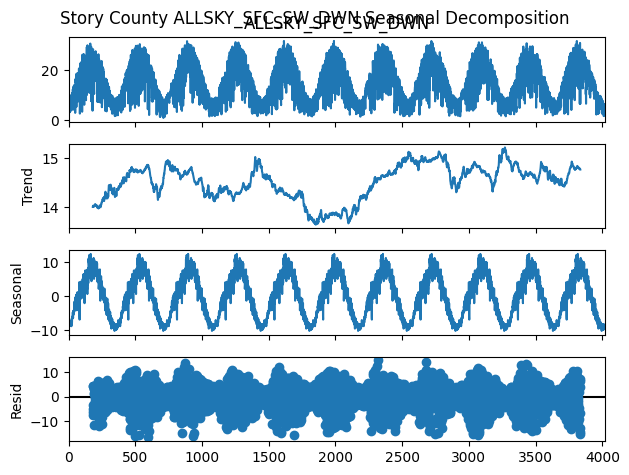

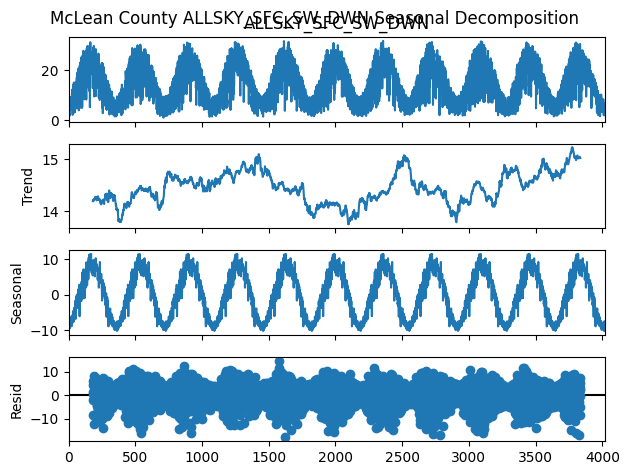

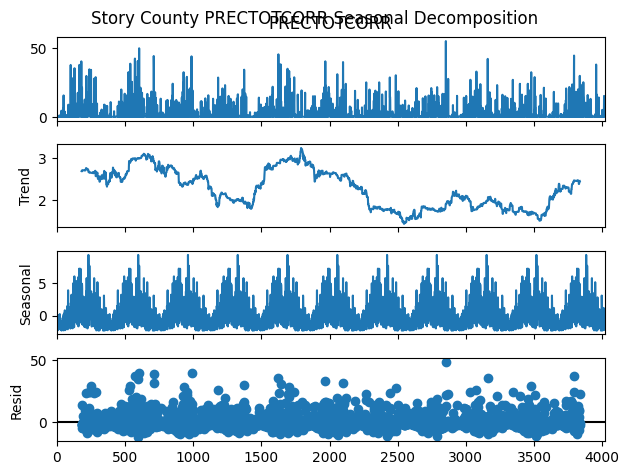

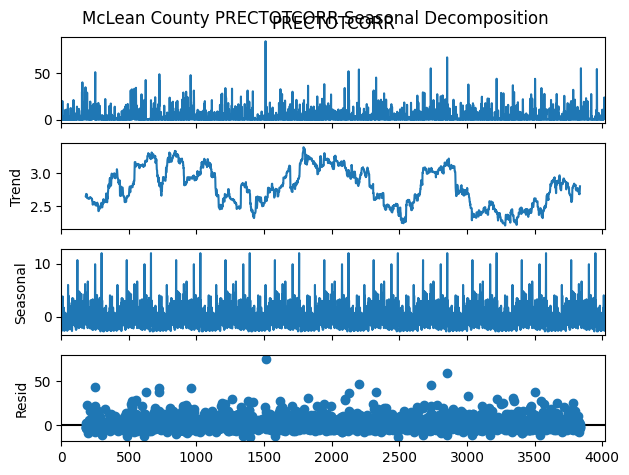

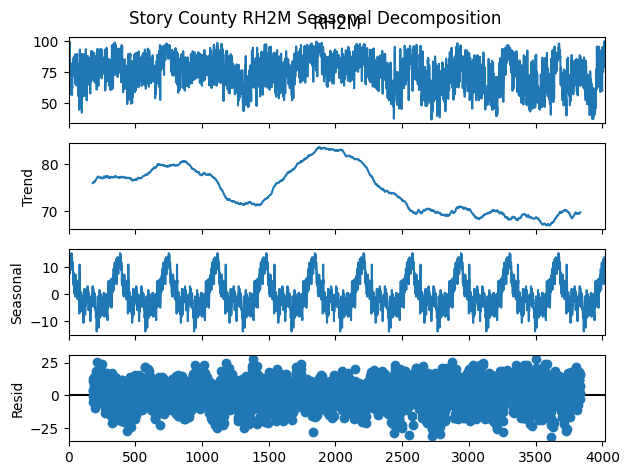

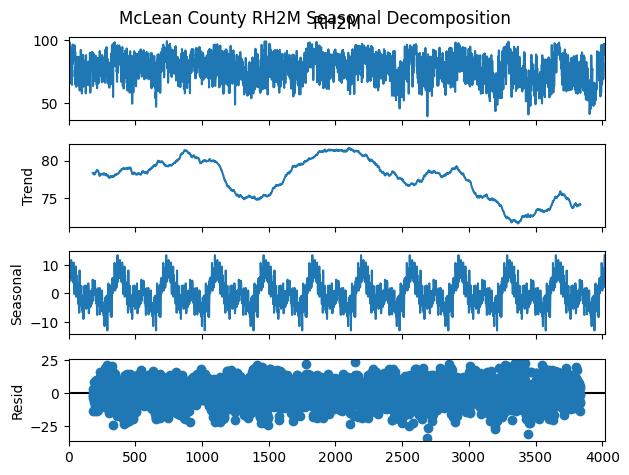

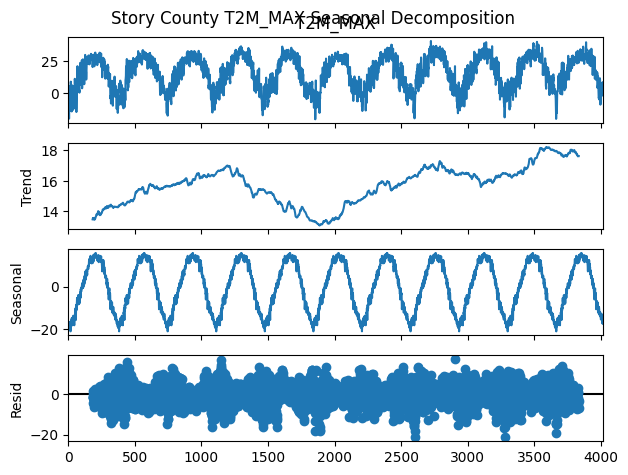

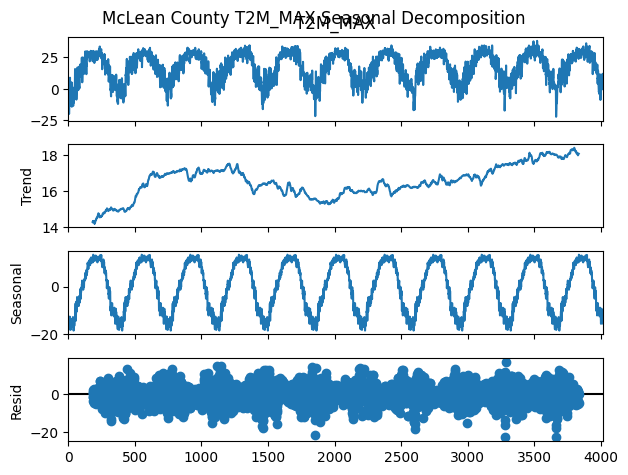

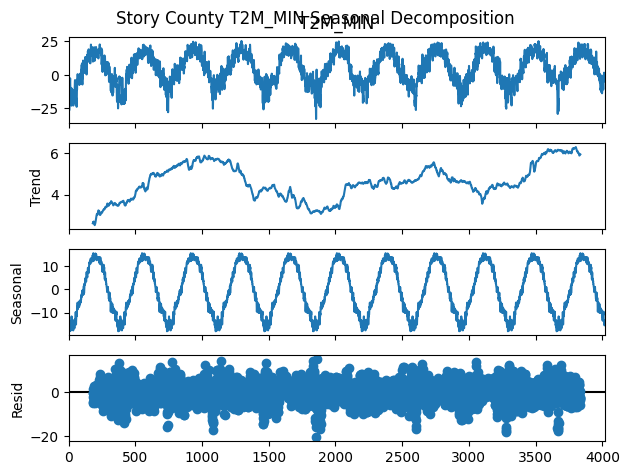

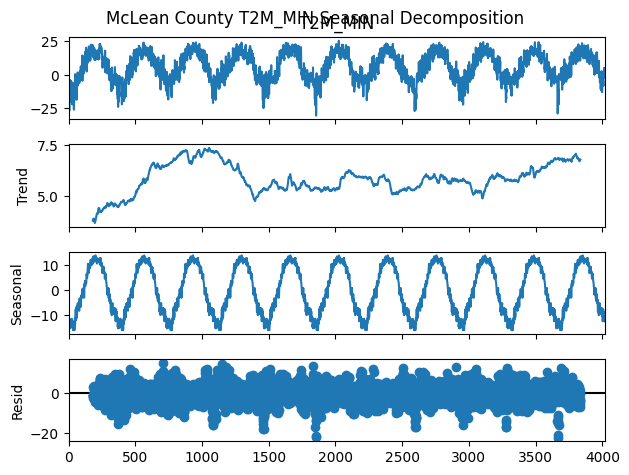

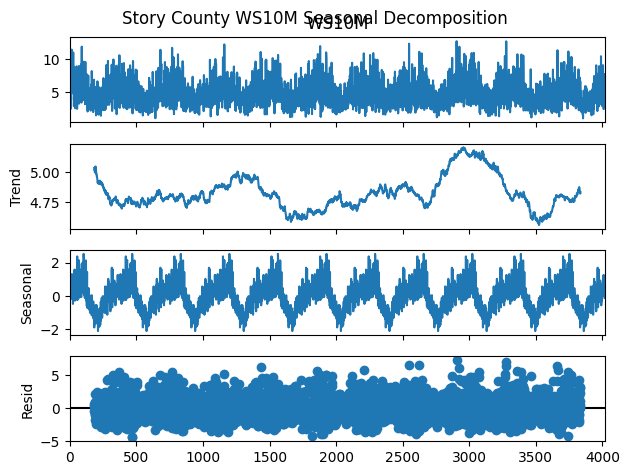

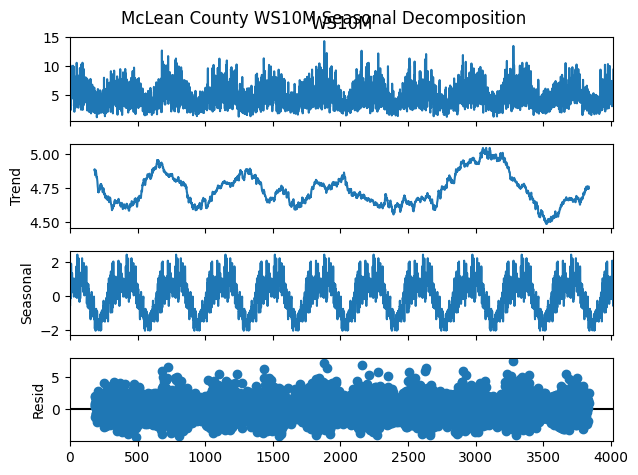

In [24]:
## Seasonal decomposition of the parameters to observe trends and seasonality


parameters = ['ALLSKY_SFC_SW_DWN', 'PRECTOTCORR', 'RH2M', 'T2M_MAX', 'T2M_MIN', 'WS10M']

for param in parameters:
    # Story County
    result_story = seasonal_decompose(story_county_weather[param], model='additive', period=365)
    result_story.plot()
    plt.suptitle(f'Story County {param} Seasonal Decomposition')
    plt.show()
    
    # McLean County
    result_mclean = seasonal_decompose(mclean_county_weather[param], model='additive', period=365)
    result_mclean.plot()
    plt.suptitle(f'McLean County {param} Seasonal Decomposition')
    plt.show()

In [26]:
## Obtaining extreme weather events based on thresholds for each parameter


# Define thresholds for extreme events (example values, adjust as needed)
thresholds = {
    'ALLSKY_SFC_SW_DWN': {'high': 25},      # High solar radiation
    'PRECTOTCORR': {'high': 20},            # Heavy precipitation
    'RH2M': {'low': 20, 'high': 95},        # Very low/high humidity
    'T2M_MAX': {'high': 35},                # Very hot days
    'T2M_MIN': {'low': -20},                # Very cold nights
    'WS10M': {'high': 15}                   # Strong wind
}

def get_extreme_events(df, thresholds):
    events = {}
    for param, thresh in thresholds.items():
        cond = pd.Series([False] * len(df))
        if 'high' in thresh:
            cond = cond | (df[param] >= thresh['high'])
        if 'low' in thresh:
            cond = cond | (df[param] <= thresh['low'])
        events[param] = df[cond][['date', param]]
    return events

story_extremes = get_extreme_events(story_county_weather, thresholds)
mclean_extremes = get_extreme_events(mclean_county_weather, thresholds)


In [27]:

print(story_extremes)
print(mclean_extremes)


{'ALLSKY_SFC_SW_DWN':            date  ALLSKY_SFC_SW_DWN
104  2014-04-15              26.31
107  2014-04-18              25.00
111  2014-04-22              26.35
114  2014-04-25              26.56
124  2014-05-05              25.96
...         ...                ...
3850 2024-07-17              28.39
3851 2024-07-18              25.74
3866 2024-08-02              27.54
3867 2024-08-03              26.78
3874 2024-08-10              25.39

[521 rows x 2 columns], 'PRECTOTCORR':            date  PRECTOTCORR
102  2014-04-13        37.90
116  2014-04-27        28.12
130  2014-05-11        35.52
166  2014-06-16        37.98
169  2014-06-19        22.76
...         ...          ...
3822 2024-06-19        20.01
3835 2024-07-02        29.94
3840 2024-07-07        23.74
3861 2024-07-28        25.25
3955 2024-10-30        38.20

[90 rows x 2 columns], 'RH2M':            date   RH2M
9    2014-01-10  98.99
325  2014-11-22  96.27
332  2014-11-29  95.36
338  2014-12-05  97.54
345  2014-12-12  95.65
